In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# @title Train
%cd /content/drive/MyDrive/OCR_YOLOv8
!pip install ultralytics

/content/drive/MyDrive/OCR_YOLOv8
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 5.4 MB/s eta 0:00:00


In [ ]:
# Download pretrain model Yolov8n - Nhanh
!wget https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n.pt

In [ ]:
# Giai nen tep firedata.zip
%cd /content/drive/MyDrive/OCR_YOLOv8
!mkdir train_data
%cd train_data
!unzip ../OCR.zip

/content/drive/MyDrive/OCR_YOLOv8
/content/drive/MyDrive/OCR_YOLOv8/train_data
Archive:  ../OCR.zip.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: train/
   creating: train/images/
 extracting: train/images/10_png.rf.352f46d55d57cfc087b691002225b409.jpg  
 extracting: train/images/10_png.rf.51635836f999730915152d124d883b3d.jpg  
 extracting: train/images/10_png.rf.fd0baad4dae1f400b8d8bce97e0e90c2.jpg  
 extracting: train/images/11_png.rf.1064915d342c3bf68445a12f455f15c5.jpg  
 extracting: train/images/11_png.rf.ba36d137d5a840d4b5ff7f9775dace58.jpg  
 extracting: train/images/11_png.rf.d60e836d138c43b8fd7fd6e778a16065.jpg  
 extracting: train/images/12_png.rf.6bbbc5f3348fe39e0d7aad736d77621c.jpg  
 extracting: train/images/12_png.rf.952d50d5a5ff5df62d7c133f6e0d77d9.jpg  
 extracting: train/images/14_png.rf.bbee9d67483a78d0632dc5fe5dcef2fd.jpg  
 extracting: train/images/14_png.rf.f511bbd090ec4f611eb8fd28

In [ ]:
# Tao Yaml de cho YOLOv6 biet foler train, folder val va so class, tên class
%cd /content/drive/MyDrive/OCR_YOLOv8
!rm data/mydataset.yaml
!echo 'train: ../train_data/train/images' >> data/mydataset.yaml
!echo 'val: ../train_data/valid/images' >> data/mydataset.yaml
!echo 'nc: 11' >> data/mydataset.yaml
!echo "names: ['Dateend', 'Name', 'Nation', 'Passid', 'birth', 'code', 'dateiss', 'placebirth', 'placeis', 'sex', 'type']" >> data/mydataset.yaml

/content/drive/MyDrive/OCR_YOLOv8


In [ ]:
# Train với Python API
from ultralytics import YOLO

model = YOLO("yolov8n.pt") # Load pretrain và finetune vài layer cuối. Transfer LEarning

results = model.train(data="data/mydataset.yaml", epochs=100)

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/OCR_YOLOv8/runs/detect/train10/weights/best.pt source=/content/drive/MyDrive/OCR_YOLOv8/train_data/train/images/2_png.rf.96475cd914ebdd15493a5bc259cc3de5.jpg

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/OCR_YOLOv8/train_data/train/images/2_png.rf.96475cd914ebdd15493a5bc259cc3de5.jpg: 640x640 1 Dateend, 4 Names, 2 Nations, 3 Passids, 1 birth, 3 codes, 1 dateiss, 1 placebirth, 1 placeis, 2 sexs, 1 type, 234.0ms
Speed: 6.4ms preprocess, 234.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
# @title KQ train
!yolo task=detect mode=train model=yolov8n.pt data=data/mydataset.yaml epochs=100 imgsz=640

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/mydataset.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fa

In [ ]:
!pip install opencv-python

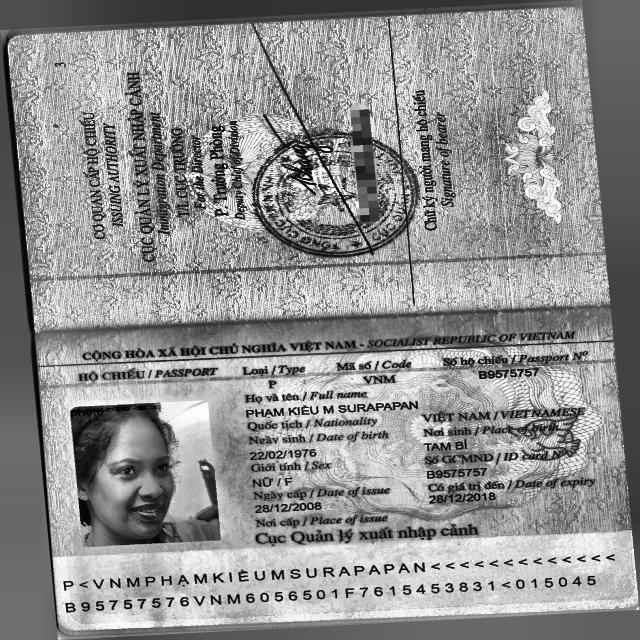


0: 640x640 1 Dateend, 4 Names, 2 Nations, 3 Passids, 1 birth, 3 codes, 1 dateiss, 1 placebirth, 1 placeis, 2 sexs, 1 type, 8.7ms
Speed: 2.2ms preprocess, 8.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
import numpy as np
import torch
import math
import pandas as pd
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

model = YOLO("/content/drive/MyDrive/OCR_YOLOv8/runs/detect/train10/weights/best.pt")
classNames = ['Dateend', 'Name', 'Nation', 'Passid', 'birth', 'code', 'dateiss', 'placebirth', 'placeis', 'sex', 'type']
img_d='/content/drive/MyDrive/OCR_YOLOv8/train_data/train/images/2_png.rf.96475cd914ebdd15493a5bc259cc3de5.jpg'

#def yolo_ocr(img):
img=cv2.imread(img_d)
results = model(img, stream=True)
cv2_imshow(img)
A = []
X=[]
for r in results:
    boxes = r.boxes
    #A.append(boxes)
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        #print(x1, y1, x2, y2)
        conf = math.ceil((box.conf[0] * 100)) / 100
        cls = int(box.cls[0])
        class_name = classNames[cls]
        #label = f'{class_name}{conf}'
        #t_size = cv2.getTextSize(label, 0, fontScale=1, thickness=2)[0]
        #print(t_size)
        #c2 = x1 + t_size[0], y1 - t_size[1] - 3
        if class_name == 'Dateend':
            color = (0, 204, 255)
        elif class_name == "Name":
            color = (222, 82, 175)
        elif class_name == "Nation":
            color = (0, 149, 255)
        elif class_name=="Passid":
            color = (255, 56, 56)
        elif class_name=="birth":
            color = (255, 157, 151)
        elif class_name=="code":
            color = (255, 112, 31)
        elif class_name=="dateiss":
            color = (255, 178, 29)
        elif class_name=="placebirth":
            color = (207, 210, 49)
        elif class_name=="placeis":
            color = (44, 153, 168)
        elif class_name=="sex":
            color = (255, 56, 56)
        elif class_name=="type":
            color = (255, 56, 56)
        if conf > 0.5:
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 3)
           #cv2.rectangle(img, (x1, y1), c2, color, -1, cv2.LINE_AA)  # filled
            #cv2.putText(img, label, (x1, y1 - 2), 0, 1, [255, 255, 255], thickness=1, lineType=cv2.LINE_AA)
        A.append(box)
        X.append(class_name)
    # for i in A:
    #     i = i.xywh[0].numpy().astype(int)
    #     x,y,w,h=i
    #     #box = boxes[i]
    #     print(i)
    #     print(x,y,w,h)
    # #print(len(A))


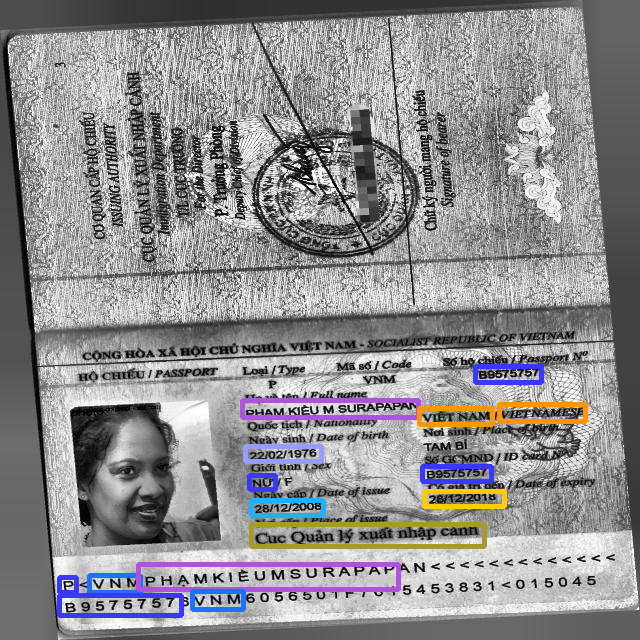

In [ ]:
cv2_imshow(img)

In [ ]:
T=[]
for i in A:
    i = i.cpu().xyxy[0].numpy().astype(int)
    x,y,xm,ym=i
    crop_img = img[y:ym, x:xm]
    cv2.imwrite("Crop/crop__" + str(i) + ".jpg", crop_img)
    # grayscale region within bounding box
    gray = cv2.cvtColor(crop_img, cv2.COLOR_RGB2GRAY)
    # resize image to three times as large as original for better readability
    gray = cv2.resize(gray, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
    # perform gaussian blur to smoothen image
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    # threshold the image using Otsus method to preprocess for tesseract
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    # perfrom bitwise not to flip image to black text on white background
    roi = cv2.bitwise_not(thresh)
    # saving the roi regions
    cv2.imwrite("Crop/roi__" + str(i) + ".jpg", roi)
    # passing to tesseract
    #vietocr
    # config =Cfg.load_config_from_name('vgg_transformer')
    # config['weights']='/tmp/vgg_transformer.pth'
    # predictor=Predictor(config)
    # s = predictor.predict(roi)
    #c = py.image_to_string(roi, config='--oem 3')
    T.append(roi)
print(X)

['Passid', 'code', 'placeis', 'Passid', 'sex', 'birth', 'Dateend', 'dateiss', 'Name', 'Name', 'code', 'Nation', 'Passid', 'Nation', 'type', 'sex', 'code', 'Name', 'Name', 'placebirth']


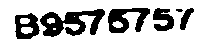

-------------


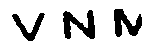

-------------


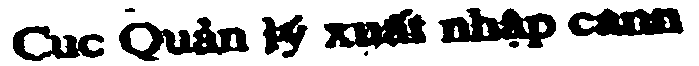

-------------


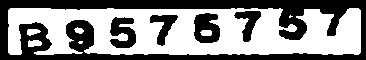

-------------


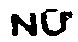

-------------


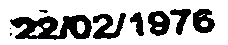

-------------


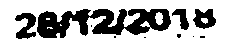

-------------


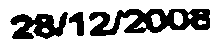

-------------


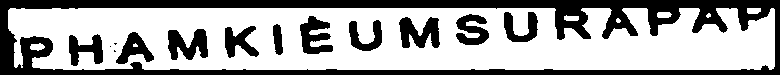

-------------


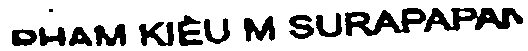

-------------


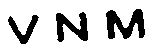

-------------


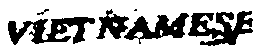

-------------


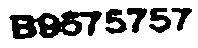

-------------


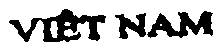

-------------


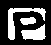

-------------


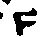

-------------


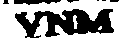

-------------


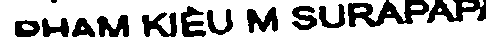

-------------


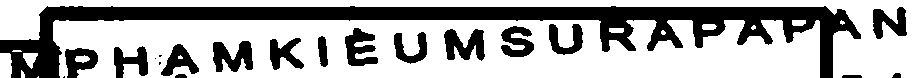

-------------


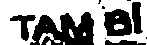

-------------


In [ ]:
from google.colab.patches import cv2_imshow
for i in T:
  #img=cv2.imread(i)
  cv2_imshow(i)
  print('-------------')

In [ ]:
#!pip install vietocr
!python3 -m pip install paddlepaddle-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.5/542.5 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00


In [ ]:
!pip install "paddleocr>=2.0.1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.7/465.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.4/148.4 kB 19.2 MB/

In [ ]:
# from vietocr.tool.predictor import Predictor
# from vietocr.tool.config import Cfg
# #vietocr
# config = Cfg.load_config_from_name('vgg_transformer')
# config['weights'] = '/content/drive/MyDrive/OCR_YOLOv8/weights/vgg19.pth'
# config['device'] = 'cpu'
# config['cnn']['pretrained']=False
# config['predictor']['beamsearch']=False
# detector = Predictor(config)\

from paddleocr import PaddleOCR,draw_ocr
ocr = PaddleOCR(use_angle_cls=True, lang='en')

OCR=[]
for i in T:
  #s = detector.predict(i)
  results = ocr.ocr(i, cls=True)
  #txts = [line[1][0] for line in results]
  #print(txts)
  print('-----------------------')
  OCR.append(results)
# c = py.image_to_string(roi, config='--oem 3')

[2023/11/09 13:15:13] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/

In [ ]:
txt=[]
import numpy as np
#txt=[line[1][0] for line in OCR]
for i in OCR:
  arr=np.array(i)
  newa =arr.reshape(-1)
  a= newa[1][0]
  txt.append(a)
  print(newa)
  #print(newa.shape)
  #print(i.shape())
  print('----------------')
#print(OCR)

[list([[14.0, 9.0], [197.0, 3.0], [198.0, 35.0], [14.0, 41.0]]) ('89575757', 0.995547890663147)]
----------------
[list([[8.0, 10.0], [144.0, 5.0], [146.0, 39.0], [10.0, 43.0]]) ('V N N', 0.9669970273971558)]
----------------
[list([[14.0, 26.0], [313.0, 15.0], [314.0, 50.0], [15.0, 61.0]]) ('Cuc Ouan .', 0.9232160449028015) list([[314.0, 18.0], [681.0, 6.0], [682.0, 39.0], [315.0, 51.0]]) ('Xuat nlsap cae?', 0.7087798714637756)]
----------------
[list([[13.0, 18.0], [358.0, 6.0], [359.0, 41.0], [15.0, 53.0]]) ('B9575757', 0.9409112334251404)]
----------------
[list([[4.0, 8.0], [73.0, 5.0], [75.0, 39.0], [6.0, 41.0]]) ('NOr', 0.6001899242401123)]
----------------
[list([[13.0, 11.0], [215.0, 4.0], [216.0, 34.0], [14.0, 41.0]]) ('22/02/1976', 0.9949604272842407)]
----------------
[list([[16.0, 7.0], [216.0, 3.0], [217.0, 35.0], [16.0, 40.0]]) ('28/12/2018', 0.9621827006340027)]
----------------
[list([[11.0, 10.0], [211.0, 3.0], [211.0, 32.0], [12.0, 40.0]]) ('28/12/2008', 0.9503071904

IndexError: ignored

In [ ]:
for i in txt:
  print(i)

89575757
V N N
Cuc Ouan .
B9575757
NOr
22/02/1976
28/12/2018
28/12/2008
PhamkieUmsura
PHAM KI U M SURAPAPAN
V N M
VIET NAMESE
B9575757
VIeT NAM


In [ ]:
B =[]
N = len(txt)
for i in range(N):
    a = txt[i]
    B.append(a)

Data = dict(zip(X,B))
print(Data)

{'Passid': 'B9575757', 'code': 'V N M', 'placeis': 'Cuc Ouan .', 'sex': 'NOr', 'birth': '22/02/1976', 'Dateend': '28/12/2018', 'dateiss': '28/12/2008', 'Name': 'PHAM KI U M SURAPAPAN', 'Nation': 'VIeT NAM'}
